In [5]:
import numpy as np
from Circle import Circle

$\newcommand{\x}{\mathbf{x}}$
$\newcommand{\c}{\mathbf{c}}$
We can formulate the problem as trying to find a centerpoint $\c \in \mathbb{R}²$ of the encompassing circle and minimizing its radius. The radius of the circle can be defined as the maximum distance $d(\cdot)$ of the center $\c$ to any point $\x$ in the cloud $\mathbf{X}$ (e.g. euclidean distance):

$$ \min_{\c \in \mathbb{R}²} \left( \max_{\x \in \mathbf{X}} d(\x,\c) \right) $$

# Iterative Algorithm
An iterative algorithm could solve the inner maximization and outer minimization alteratingly. Given a centerpoint $\c$, solve for $\x$, and given $\x$, find the centerpoint $\c$. (Or updating $\c$ from an existing $\c$ approximation, rather than computing it from scratch)

In [6]:
from vector_ops import find_most_distant, find_most_distant_point_pair

In [7]:
def update_c(old_c, target, step):
    α = 1/step
    new_c = old_c + α*(target - old_c)
    return new_c.reshape(old_c.shape)

In [8]:
from vector_ops import distance

def smallest_circle(pts) -> Circle:
    p1, p2 = find_most_distant_point_pair(pts)
    ε = distance(p1, p2)/500  # convergence tolerance
    
    c = np.zeros((1,2))
    converged = False
    step = 1
    while not converged:
        x = find_most_distant(pts, c)
        c_new = update_c(c, x, step)
        converged = distance(c, c_new) < ε
        c = c_new
        step += 1

    print(f"{step} iterations performed")
    return Circle(center_point=c, radius=distance(x, c) + ε)

# Benchmark

264 iterations performed


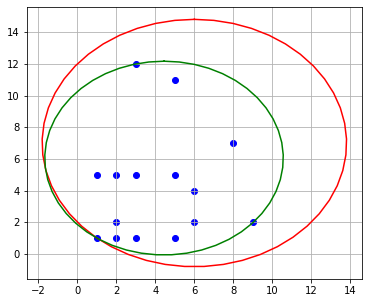

In [10]:
import matplotlib.pyplot as plt
from start import create_curve_for, load_example_points

fig = plt.figure(figsize=(6, 5))
plt.grid()

X = load_example_points()
plt.scatter(*X.T, c="blue")

direct_solution = create_curve_for(Circle.guaranteed_to_encompass(X))
plt.plot(*direct_solution, c="red")

iterative_solution = create_curve_for(smallest_circle(X))
plt.plot(*iterative_solution, c="green")